In [3]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date/time manipulation
from datetime import datetime
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv("/content/final_internship_data (2).csv")

In [6]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [7]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15362 entries, 0 to 15361
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User ID            15362 non-null  object 
 1   User Name          15362 non-null  object 
 2   Driver Name        15362 non-null  object 
 3   Car Condition      15362 non-null  object 
 4   Weather            15362 non-null  object 
 5   Traffic Condition  15362 non-null  object 
 6   key                15362 non-null  object 
 7   fare_amount        15362 non-null  float64
 8   pickup_datetime    15362 non-null  object 
 9   pickup_longitude   15362 non-null  float64
 10  pickup_latitude    15362 non-null  float64
 11  dropoff_longitude  15362 non-null  float64
 12  dropoff_latitude   15362 non-null  float64
 13  passenger_count    15362 non-null  int64  
 14  hour               15362 non-null  int64  
 15  day                15362 non-null  int64  
 16  month              153

In [8]:
df.isnull().sum()

,0
User ID,0
User Name,0
Driver Name,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0


In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
User ID,0
User Name,0
Driver Name,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0


In [11]:
df.drop(['User ID', 'User Name', 'Driver Name'], axis=1, inplace=True)

In [12]:
df.head()

,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


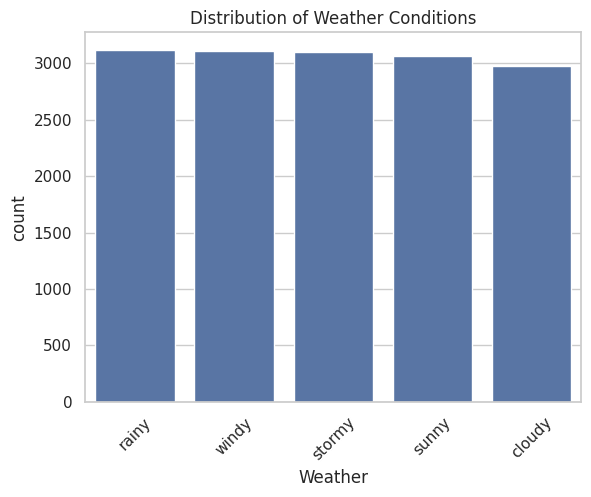

In [13]:
sns.countplot(data=df, x='Weather', order=df['Weather'].value_counts().index)
plt.title("Distribution of Weather Conditions")
plt.xticks(rotation=45)
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Car Condition'] = le.fit_transform(df['Car Condition'])
df['Weather'] = le.fit_transform(df['Weather'])
df['Traffic Condition'] = le.fit_transform(df['Traffic Condition'])



In [15]:
df.head()

,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,3,4,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,1,0,2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,0,2,0,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,3,2,2,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,0,2,0,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


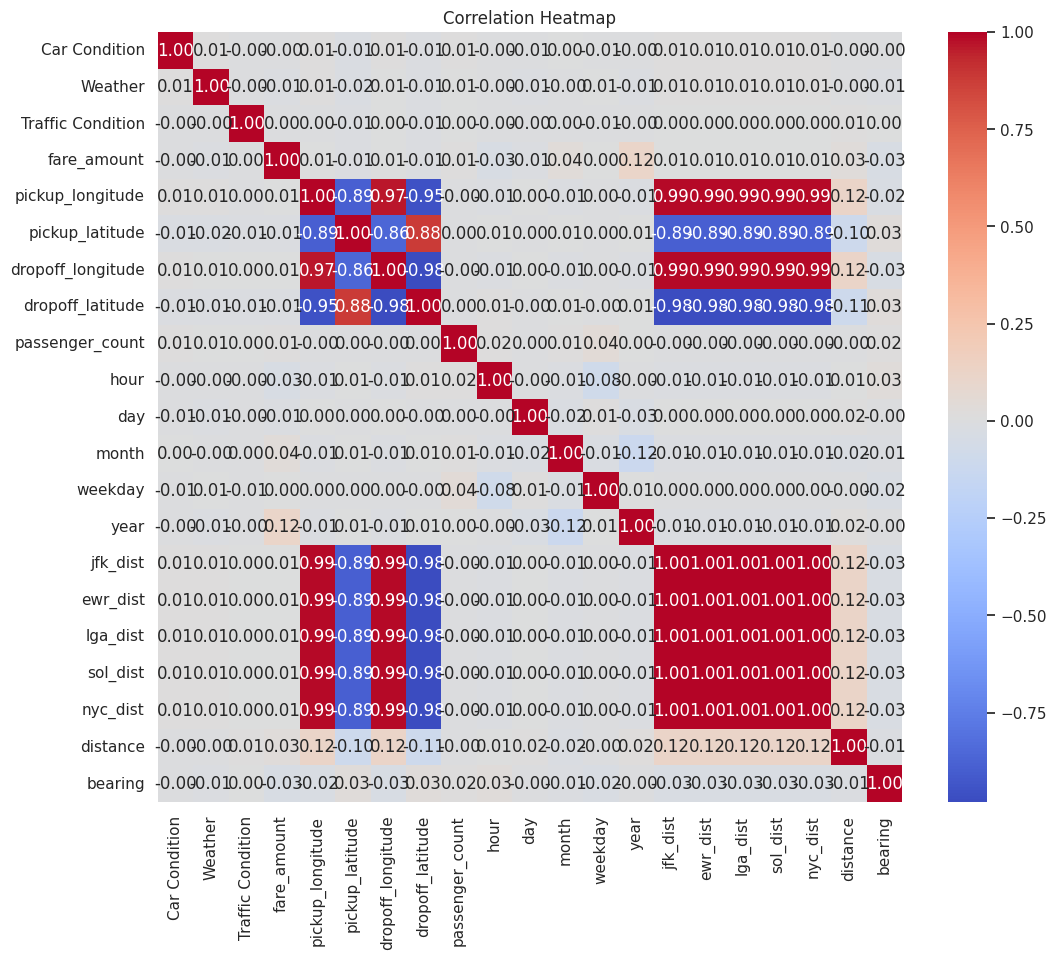

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [17]:
df['Traffic Condition'].value_counts()


,count
Traffic Condition,
0,5134
1,5122
2,5105


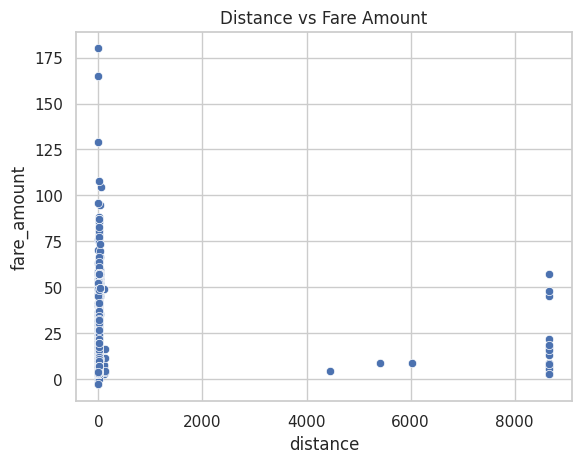

In [18]:
sns.scatterplot(data=df, x='distance', y='fare_amount')
plt.title('Distance vs Fare Amount')
plt.show()

In [27]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [30]:
df.head()

,car_condition,weather,traffic_condition,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,3,4,0,2009-06-15 17:26:21.0000001,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,1,0,2,2010-01-05 16:52:16.0000002,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,0,2,0,2011-08-18 00:35:00.00000049,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,3,2,2,2012-04-21 04:30:42.0000001,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,0,2,0,2010-03-09 07:51:00.000000135,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [33]:
df.drop('key', axis=1, inplace=True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Features and target
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(model, params, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [37]:
best_model = grid.best_estimator_
best_score = grid.best_score_
print("Best Model:", best_model)
print("Best CV Score:", best_score)

# Test set accuracy
test_score = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

Best Model: RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)
Best CV Score: 0.7787630242123426
Test Set Accuracy: 0.7209249930643613
